# <center> Churn Prediction using Decision Tree </center>

___

Decision Tree converts a set of features and observations into a set of rules, resulting in a prediction. It gives a tree in which each node is a splitting feature that divides the observations into two or more branches with an objective of creating homogeneous subsets.

<img src="img/simple_DT_example.png" alt="http://intellspot.com/decision-tree-examples/" width="500" height="500">

The impurity of a split is measured commonly in two ways :
- GINI Index 
- Entropy

The splitting variable maximizes information gain (or minimizes impurity) which the difference between impurity before the split and after the split.

___

## Customer Churn Data

We will use [Customer Churn Dataset](https://www.kaggle.com/blastchar/telco-customer-churn). The data provides information about the customer services usage pattern. 

| Feature | Description |
| --- | --- |
| CustomerID | Customer ID |
| Gender | Customer gender (female, male) |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| Tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | The amount charged to the customer monthly |
| TotalCharges | The total amount charged to the customer |
| Churn | Whether the customer churned or not (Yes or No) |

**The goal is to predict the chances of churn so that appropriate action can be taken to retain the customers.**

___

## Load the libraries

In [1]:
import pandas as pd

# skip warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
customer_churn = pd.read_csv("Telco-Customer-Churn.csv")

customer_churn.shape

(7043, 21)

There are a total of 7043 customers in the data set and 21 variables. 

## Exploratory Data Analysis

Let us take a look at a portion of the data.

In [3]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let us check if all columns are in appropriate data format.

In [4]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<div class="alert alert-block alert-info"><b> 
    
-  All objects types are categorical.
- TotalCharges should be float but pandas read it as object. This means there are some string type values.
</b></div>    

Let us write a small code to verify which string values are present in TotalCharges column. 

- We will run a loop to convert each value in the column to float.
- If the float conversion is unsuccessful that means the value is string and we will get a `ValueError`.
- We will use this error to find out the invalid values.

This can be accomplished by exception handling in Python using `try-catch-except` blocks.

In [5]:
data = customer_churn['TotalCharges']

for index in range(0, len(data)):
    try :
        skip = float(data[index])
    except ValueError :
        print(index, data[index])

488  
753  
936  
1082  
1340  
3331  
3826  
4380  
5218  
6670  
6754  


As we can see all these string values are spaces. Let us read the data again and instruct pandas to read space as NA. 

In [6]:
customer_churn = pd.read_csv("Telco-Customer-Churn.csv", na_values = ' ')
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now, TotalCharges is correctly read as float.

<div class="alert alert-block alert-info"><b> 

- We will check if customerID is unique then we will convert it to row index.
</b></div>    



In [7]:
customer_churn.customerID.nunique()

7043

In [8]:
customer_churn.set_index('customerID', inplace = True)
customer_churn.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<div class="alert alert-block alert-info"><b> 

- Our target variable is a string, we will convert it to numeric code - 0 or 1.
</b></div>    

In [11]:
customer_churn.Churn = customer_churn.Churn.astype('category').cat.codes

Let us seperate our numerical and categorical attributes.

In [38]:
# create a list for all categorical column names
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
            'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'Contract', 'PaperlessBilling', 
            'PaymentMethod']

# create a list for all numerical column names
num_cols = customer_churn.columns[~customer_churn.columns.isin(cat_cols)]

# remove target column
num_cols = num_cols.delete(-1)

num_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [10]:
customer_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                  int8
dtype: object

We shall check there are no invalid values in any of the categorical variables.

In [39]:
for x in cat_cols :
    print(x, '----->>', customer_churn[x].unique(), '\n')

gender ----->> ['Female' 'Male'] 

SeniorCitizen ----->> [0 1] 

Partner ----->> ['Yes' 'No'] 

Dependents ----->> ['No' 'Yes'] 

PhoneService ----->> ['No' 'Yes'] 

MultipleLines ----->> ['No phone service' 'No' 'Yes'] 

InternetService ----->> ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ----->> ['No' 'Yes' 'No internet service'] 

OnlineBackup ----->> ['Yes' 'No' 'No internet service'] 

DeviceProtection ----->> ['No' 'Yes' 'No internet service'] 

TechSupport ----->> ['No' 'Yes' 'No internet service'] 

StreamingTV ----->> ['No' 'Yes' 'No internet service'] 

StreamingMovies ----->> ['No' 'Yes' 'No internet service'] 

Contract ----->> ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ----->> ['Yes' 'No'] 

PaymentMethod ----->> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 



Let us see if there is any invalid values in numerical columns

In [40]:
customer_churn[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


> The data looks clean.

Let us check for number of NA values.

In [41]:
customer_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<div class="alert alert-block alert-info"><b> 
    
- As there are only 11 NA values, we can impute these with the mean. We will do these steps in the preprocess function later.

</b></div>

We will seperate our independent variables and target variable.

In [42]:
# independent variables
X = customer_churn.drop('Churn', axis = 1)

# dependent variable
y = customer_churn["Churn"]

### Function to prepare data

We will write a function to prepare data for following functions.

- Train and Test Split
- Fit the Imputer on Train Data

As Decision Tree is not impacted by standardisation and the numerical variables are also of similar scale, we will not do standardisation.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer()

In [44]:
def prepare_data(X, y, split_size = 0.3) :
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = split_size)  
    
    num_imputer.fit(X_train[num_cols])
    
    print(X_train.shape)
    print(X_test.shape)

    return X_train, X_test, y_train, y_test

In [45]:
# call function to prepare data
X_train, X_test, y_train, y_test = prepare_data(X, y)

(4930, 19)
(2113, 19)


### Function to pre-process data

We will write a function to pre-process data for following functions. This function will be called to transform both train and test datasets.

- Impute the numerical features
- Dummify the categorical features

In [46]:
def preprocess_data(data) :
    
    # impute numerical features
    data[num_cols] = num_imputer.transform(data[num_cols])
    
    # dummify categorical features
    data = pd.get_dummies(data, drop_first = True)

    return data

Call the pre-process function for both train and test data.

In [47]:
X_train = preprocess_data(X_train)
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
8092-NLTGF,0,72.0,24.75,1777.60,1,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0
6341-AEVKX,0,62.0,104.30,6613.65,0,1,0,1,0,0,...,0,1,0,1,1,0,1,0,1,0
4441-NIHPT,1,13.0,74.30,940.35,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
9318-NKNFC,0,1.0,18.85,18.85,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
6179-GJPSO,1,43.0,108.15,4600.70,0,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0


In [48]:
X_test = preprocess_data(X_test)
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7825-GKXMW,0,1.0,45.80,45.80,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
0384-RVBPI,0,20.0,64.40,1398.60,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
9415-TPKRV,0,8.0,55.75,446.80,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
7029-IJEJK,0,54.0,44.10,2369.70,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4012-ZTHBR,0,21.0,44.95,926.25,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Build Decsion Tree Model

___

### Function for Model Fit & Predict

We will write a function for following functions. 

- Fit the model on train data
- Perform cross-validation when needed
- Predict on train and test data

In [49]:
from sklearn.model_selection import GridSearchCV

def model_building(model, params = None, k = 1) :
    
    if params == None :
        model.fit(X_train, y_train)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X_train), model.predict(X_test))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        model_cv.fit(X_train, y_train)
        model = model_cv.best_estimator_
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X_train), model.predict(X_test))
    

Sklearn library provides a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function in its tree module. The same way we can also use `DecisionTreeRegressor`

In our first attempt, we will create a decision tree the default parameters.

Some important hyperparameters are
- criterion = ’gini’, 
- max_depth = None, 
- min_samples_split = 2, 
- min_samples_leaf = 1, 
- min_weight_fraction_leaf = 0.0, 
- max_features = None, 
- max_leaf_nodes = None, 
- min_impurity_decrease = 0.0, 
- min_impurity_split = None, 
- class_weight = None

In [50]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

model, pred_train, pred_test = model_building(dtc)

#### Feature Importance

In [51]:
model.feature_importances_

array([2.02055431e-02, 2.16740543e-01, 1.63738298e-01, 2.01107176e-01,
       2.51017664e-02, 1.83660992e-02, 2.07835449e-02, 1.32780818e-03,
       1.55202915e-03, 1.94250519e-02, 1.08306822e-01, 0.00000000e+00,
       7.38521245e-03, 1.55535341e-02, 5.19320259e-04, 1.89002542e-02,
       1.73106753e-04, 1.78541002e-02, 0.00000000e+00, 1.54178557e-02,
       0.00000000e+00, 1.83956642e-02, 2.37800878e-03, 8.84741779e-03,
       1.20874471e-02, 1.09794371e-02, 2.37626336e-02, 1.54467480e-02,
       2.21285412e-02, 1.35160361e-02])

In [52]:
importance = pd.DataFrame([model.feature_importances_], 
                          columns = X_train.columns)

importance.sort_values(by = 0, axis = 1, 
                       ascending = False, 
                       inplace = True)

In [53]:
importance

,tenure,TotalCharges,MonthlyCharges,InternetService_Fiber optic,gender_Male,PaperlessBilling_Yes,PaymentMethod_Electronic check,Dependents_Yes,SeniorCitizen,MultipleLines_Yes,...,StreamingMovies_Yes,OnlineSecurity_No internet service,StreamingMovies_No internet service,MultipleLines_No phone service,PhoneService_Yes,OnlineBackup_No internet service,DeviceProtection_No internet service,InternetService_No,TechSupport_No internet service,StreamingTV_No internet service
0,0.216741,0.201107,0.163738,0.108307,0.025102,0.023763,0.022129,0.020784,0.020206,0.019425,...,0.008847,0.007385,0.002378,0.001552,0.001328,0.000519,0.000173,0.0,0.0,0.0


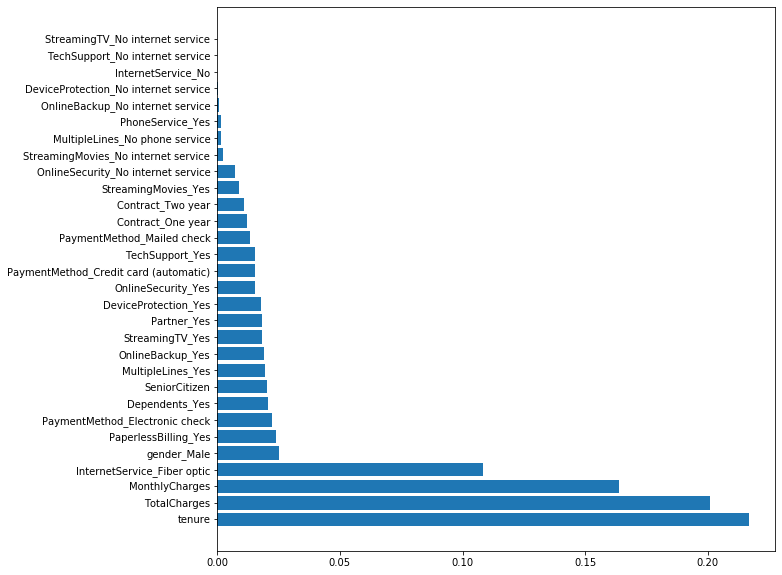

In [54]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 10,10
plt.barh(importance.columns, importance.iloc[0].values)
plt.show()

### Function to Evaluate Model

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, 
classification_report 

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-55-5cd326d7d651>, line 1)

In [ ]:
def model_evaluation(actuals, predictions) :
    
    print('\nConfusion Matrix :')
    print(confusion_matrix(actuals, predictions) ) 
    
    print('\nReport : ')
    print(classification_report(actuals, predictions))
    
    print('\nAccuracy Score :', accuracy_score(actuals, predictions)) 
    print("------------------------------------------------------------------")

In [56]:
model_evaluation(y_train, pred_train)

model_evaluation(y_test, pred_test)

NameError: name 'model_evaluation' is not defined

### Function to plot Decision Tree Model

In [ ]:
!pip

In [61]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [62]:
def plot_dt(model) :
    
    dot_data = StringIO()
    export_graphviz(model, out_file = dot_data, filled = True)
    
    return pydotplus.graph_from_dot_data(dot_data.getvalue())  
    

In [63]:
Image(plot_dt(model).create_png())

InvocationException: GraphViz's executables not found

Based on the results, we can say that the model is overfitting as the train accuracy is much higher than the test accuracy. This is expected because the default parameters allow the tree to grow full depth.

Let us try some of the arguments for pruning the tree.

Based on the results, we can say that the model is overfitting as the train accuracy is much higher than the test accuracy. This is expected because the default parameters allow the tree to grow full depth.

Let us try some of the arguments for pruning the tree.

### Decision Tree Classifier with Hyper parameter of Max_Depth = 2

In [59]:
dtc_2 = DecisionTreeClassifier(max_depth = 2)

model_2, pred_train_2, pred_test_2 = model_building(dtc_2)

In [60]:
model_evaluation(y_train, pred_train_2)

model_evaluation(y_test, pred_test_2)

NameError: name 'model_evaluation' is not defined

In [ ]:
y_train.value_counts()

In [ ]:
Image(plot_dt(model_2).create_png())

After adjusting for max_depth hyperparameter, ouw test accuracy has improved by a good margin.

Let us see how to set a range of parameters and run the algorithm to find the best tuning parameters. We will also apply cross-validation so that we get stable results.

### Decision Tree Classifier with Grid Search Crossvalidation

In [ ]:
parameters = {'max_depth' : range(1,10), 
              'min_impurity_decrease' : [0.0001, 0.01]}

model_cv, model_3, pred_train_3, pred_test_3 = model_building(dtc, 
                                                              parameters, 
                                                              10)

In [ ]:
model_cv.best_params_

In [28]:
model_evaluation(y_train, pred_train_3)

model_evaluation(y_test, pred_test_3)

NameError: name 'model_evaluation' is not defined

In [ ]:
Image(plot_dt(model_3).create_png())

___